In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv('/Users/ruslanhuretski/Downloads/london.csv', parse_dates=['timestamp'])

In [27]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [28]:
df.shape

(17414, 10)

In [29]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [30]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [34]:
sns.set(rc={'figure.figsize':(12,12)})

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

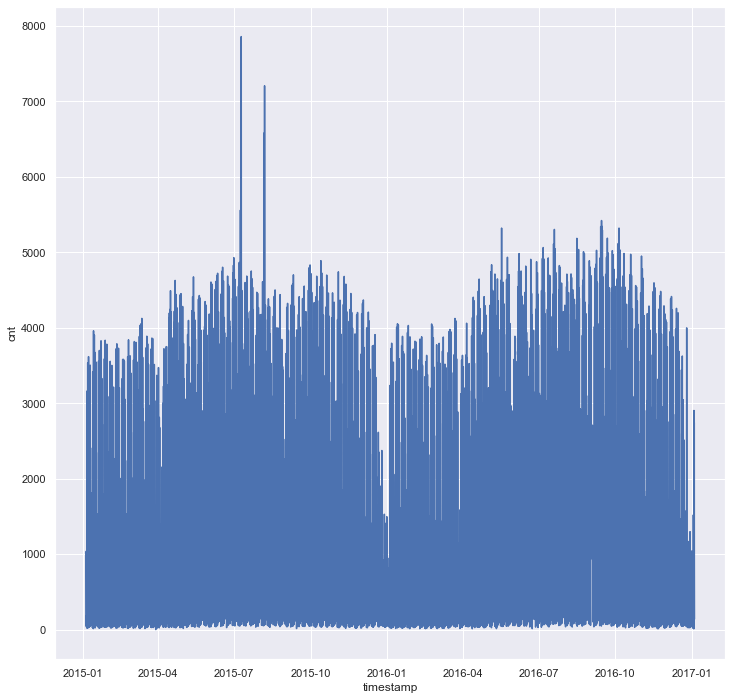

In [35]:
sns.lineplot(x='timestamp', y='cnt', data=df)

In [56]:
df = df.set_index('timestamp').sort_values('timestamp')

In [75]:
a = df.resample(rule='D').agg({'cnt': 'sum'})

In [76]:
b = df.resample(rule='D').agg({'cnt': 'sum'}).rolling(window=3).mean()

In [77]:
c = a - b

In [80]:
std = np.std(c)

In [114]:
std

cnt    4558.586641
dtype: float64

In [115]:
df_agg = df.resample(rule='D').agg({'cnt': 'sum'})

In [116]:
df_agg['cnt_mean'] = df.resample(rule='D').agg({'cnt': 'sum'}).rolling(window=3).mean()

In [117]:
df_agg['upper_bound'] = round(df_agg.cnt_mean + 2.576 * 4558.586641, 2)

In [118]:
df_agg['lower_bound'] = round(df_agg.cnt_mean - 2.576 * 4558.586641, 2)

In [119]:
df_agg

,cnt,cnt_mean,upper_bound,lower_bound
timestamp,,,,
2015-01-04,9234,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN
2015-01-06,20613,16739.666667,28482.59,4996.75
2015-01-07,21064,20683.000000,32425.92,8940.08
2015-01-08,15601,19092.666667,30835.59,7349.75
...,...,...,...,...
2016-12-30,11566,12682.000000,24424.92,939.08
2016-12-31,11424,12347.333333,24090.25,604.41
2017-01-01,6421,9803.666667,21546.59,-1939.25


In [127]:
df_agg.query('cnt > upper_bound or cnt < lower_bound')

,cnt,cnt_mean,upper_bound,lower_bound
timestamp,,,,
2015-05-14,15609,28709.333333,40452.25,16966.41
2015-07-09,72504,50705.000000,62447.92,38962.08
2015-07-12,23240,36036.666667,47779.59,24293.75
2015-07-24,16034,31013.666667,42756.59,19270.75
2015-08-06,63468,46627.333333,58370.25,34884.41
2015-08-24,17400,29529.333333,41272.25,17786.41
2015-11-14,8898,21037.333333,32780.25,9294.41
2016-09-02,0,26086.333333,37829.25,14343.41
2016-09-04,27512,14259.000000,26001.92,2516.08
